In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn

In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#1 .How many passengers are described in the data set?

In [3]:
num_passengers = len(t)
print("Number of passengers:", num_passengers)


Number of passengers: 891


# 2. How many distinct values are in who column?

In [4]:
distinct_who_values = t['who'].nunique()
print("Distinct values in 'who' column:", distinct_who_values)


Distinct values in 'who' column: 3


#3. How many missing values do you fnd in each data column?

In [5]:
missing_values = t.isnull().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# 4. Does the data contain passengers over 60 old? How many?

In [6]:
passengers_over_60 = t[t['age'] > 60]
num_passengers_over_60 = len(passengers_over_60)
print("Passengers over 60 years old:", num_passengers_over_60)


Passengers over 60 years old: 22


#5. What is the passenger age distribution?

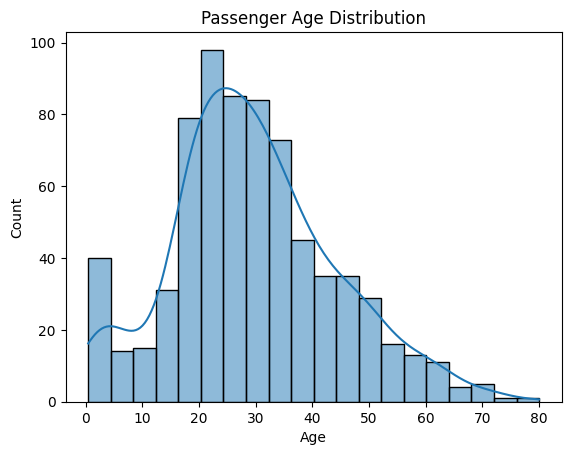

In [8]:
sns.histplot(t['age'], kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Passenger Age Distribution")
plt.show()


# 6. What are the 3-quantiles of the passenger age distribution?

In [10]:
quantiles = t['age'].quantile([0.25, 0.50, 0.75])
print("3-Quantiles of passenger age distribution:")
print(quantiles)


3-Quantiles of passenger age distribution:
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


# 7. How will you drop all passengers with no embarked data?

In [12]:
t = t.dropna(subset=['embarked'])
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# 8. What is the average, minimum, and maximum fares paid by the passengers?

In [13]:
average_fare = t['fare'].mean()
minimum_fare = t['fare'].min()
maximum_fare = t['fare'].max()

print("Average Fare:", average_fare)
print("Minimum Fare:", minimum_fare)
print("Maximum Fare:", maximum_fare)


Average Fare: 32.09668087739032
Minimum Fare: 0.0
Maximum Fare: 512.3292


#9. What are the proportions of passengers in different classes?

In [14]:
class_proportions = t['class'].value_counts(normalize=True)
print("Proportions of passengers in different classes:\n", class_proportions)


Proportions of passengers in different classes:
 Third     0.552306
First     0.240720
Second    0.206974
Name: class, dtype: float64


#10. What is the female to male ratio in each travel class?

In [20]:
class_gender_counts = t.groupby(['class', 'who'])['who'].count().unstack()
class_gender_counts['female_to_male_ratio'] = class_gender_counts['woman'] / class_gender_counts['man']
print("Female to Male Ratios in Each Travel Class:\n", class_gender_counts['female_to_male_ratio'])


Female to Male Ratios in Each Travel Class:
 class
First     0.747899
Second    0.666667
Third     0.357367
Name: female_to_male_ratio, dtype: float64


#11.What fraction survived?

In [22]:
survival_fraction = t['survived'].mean()
print("Fraction of passengers who survived:", survival_fraction)


Fraction of passengers who survived: 0.38245219347581555


#12. Are the survival rates of male and female passengers different?

In [23]:
survival_rates_by_gender = t.groupby('sex')['survived'].mean()
print("Survival rates by gender:\n", survival_rates_by_gender)


Survival rates by gender:
 sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


#13. Are the survival rates of frst, second, and third class passengers different?

In [24]:
survival_rates_by_class = t.groupby('class')['survived'].mean()
print("Survival rates by class:\n", survival_rates_by_class)


Survival rates by class:
 class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


#14. How can one print a table of survival rate dependencies on class and gender?

In [26]:
pivot_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("Survival rate dependencies on class and gender:\n", pivot_table)


Survival rate dependencies on class and gender:
 sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


#15. How can one print a table with number of survivors and average fare for each gender and cabin?

In [30]:
pivot_table = t.pivot_table(index='sex', values=['survived', 'fare'], aggfunc={'survived': 'sum', 'fare': 'mean'})
print("Number of survivors and average fare by gender:\n", pivot_table)


Number of survivors and average fare by gender:
              fare  survived
sex                        
female  44.252124       231
male    25.523893       109
